In [59]:
import numpy as np
import matplotlib.pyplot as plt
import math

def log(x):
    return math.log(x)

def e(x):
    return math.exp(x)

In [60]:
def f(w,b,x):
    m=len(x)
    return (1/(1+(e(-(np.dot(w,x)+b)))))

In [61]:
def dJ_dwk(w,b,x,y,k,lambda_):
    m=len(x)
    n=len(w)
    res=0
    for i in range(m):
        res+= (f(w,b,x[i])-y[i])*x[i][k]
    reg=0
    for j in range(n):
        reg+= (lambda_*w[j])
    return (res+reg)/m

In [62]:
def dJ_db(w,b,x,y):
    m=len(x)
    res=0
    for i in range(m):
        res+= (f(w,b,x[i])-y[i])
    return res/m

In [63]:
def reg_cost(w,b,x,y,lambda_):
    m=len(x)
    n=len(w)
    cost=0
    for i in range(m):
        cost+= -y[i]*(log(f(w,b,x[i])))-(1-y[i])*(log(1-f(w,b,x[i])))
    reg=0
    for j in range(n):
        reg+= (0.5*lambda_)*(w[j]**2)
    return (cost+reg)/m

In [64]:
def reg_gradient_descent(w,b,x,y,lambda_,l_r,init_cost,cost_history,max_steps=10000,step=0):
    m=len(x)
    n=len(w)
    if init_cost is None:
        init_cost=reg_cost(w,b,x,y,lambda_)
    new_w=w.copy()
    for i in range(n):
        new_w[i]=new_w[i]-(l_r*dJ_dwk(new_w,b,x,y,i,lambda_))
    new_b=b-(l_r*dJ_db(new_w,b,x,y))
    new_cost=reg_cost(new_w,new_b,x,y,lambda_)
    cost_history.append(new_cost)
    if new_cost<init_cost and step<max_steps:
        return reg_gradient_descent(new_w,new_b,x,y,lambda_,l_r,init_cost,cost_history,max_steps,step+1)
    else:
        return new_w,new_b, cost_history

In [65]:
np.random.seed(1)
x = np.random.rand(5,3)
y = np.array([0,1,0,1,0])
w = np.random.rand(x.shape[1])
b = 0.5
lambda_ = 0.7
reg_cost(w,b,x,y,lambda_)

0.983331052047505

In [66]:
dJ_dwk(w,b,x,y,1,lambda_)

0.4921571062230511

In [67]:
dJ_db(w,b,x,y)

0.341798994972791

In [72]:
cost_history=[]

In [73]:
l_r=0.0001

In [75]:
lambda_=0.1

In [77]:
import sys
sys.setrecursionlimit(100000)

In [78]:
reg_gradient_descent(w,b,x,y,lambda_,l_r,None,cost_history)

(array([0.57804087, 0.15373   , 0.51131909]),
 0.20802386118948624,
 [0.9271618499694567,
  0.9271409073308957,
  0.9271199658502521,
  0.9270990255274899,
  0.9270780863625726,
  0.9270571483554646,
  0.9270362115061289,
  0.9270152758145302,
  0.9269943412806321,
  0.9269734079043983,
  0.9269524756857926,
  0.9269315446247791,
  0.9269106147213215,
  0.9268896859753836,
  0.9268687583869293,
  0.9268478319559224,
  0.9268269066823269,
  0.9268059825661062,
  0.9267850596072245,
  0.9267641378056458,
  0.9267432171613337,
  0.9267222976742516,
  0.926701379344364,
  0.9266804621716339,
  0.9266595461560263,
  0.9266386312975039,
  0.9266177175960311,
  0.9265968050515715,
  0.9265758936640888,
  0.926554983433547,
  0.9265340743599099,
  0.9265131664431412,
  0.9264922596832044,
  0.9264713540800642,
  0.9264504496336835,
  0.926429546344026,
  0.9264086442110564,
  0.9263877432347372,
  0.9263668434150334,
  0.9263459447519079,
  0.926325047245325,
  0.9263041508952486,
  0.92628325

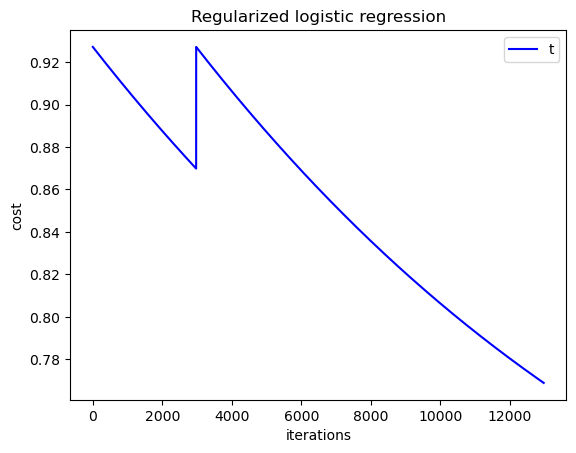

In [81]:
iters=np.arange(len(cost_history))
plt.plot(iters,cost_history,c='b')
plt.xlabel('iterations')
plt.ylabel('cost')
plt.title('Regularized logistic regression')
plt.legend('true')